In [63]:
%%capture 
%load_ext autoreload
%autoreload 2
%reset -f

In [64]:
import os
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Initialize the Variables

In [65]:
chan_names = ['POz','PO3','PO4','PO7','PO8','Oz','O1','O2']
chan_nums = list(range(1,9)) # make list from 1 to 8

# left hemisphere -> odd numbers (1,3,5,7) 
left_hemisphere = [chan for chan in chan_names if chan[-1].isdigit() and int(chan[-1]) % 2 != 0]
# right hemisphere -> even numbers (2,4,6,8)
right_hemisphere = [chan for chan in chan_names if chan[-1].isdigit() and int(chan[-1]) % 2 == 0]
# midline -> z
midline_hemisphere = [chan for chan in chan_names if chan[-1] == 'z']

fs, lf, hf = 2000, 4, 45 #Hz
folder_path = 'data/Alken-29March/'

In [66]:
dat_paths = [folder_path+f for f in os.listdir(folder_path) if f.endswith('.dat')]
raw_list = []
for f in dat_paths:
    raw = mne.io.read_raw_curry(f, preload=True, verbose=False)
    # Set the filename attribute to the name of the file
    raw.filename = os.path.basename(os.path.splitext(raw.filenames[0])[0])
    raw_list.append(raw)
# keep only picks in chan_names
raw_list = [raw.pick_channels(chan_names) for raw in raw_list]

### Filter

In [67]:
# filtered in the 4-45 Hz frequency band
# with a fourth order zero-phase digital Butterworth filter
for raw in raw_list:
    raw.filter(4, 45, method='fir', fir_design='firwin', phase='zero-double', verbose=False) 

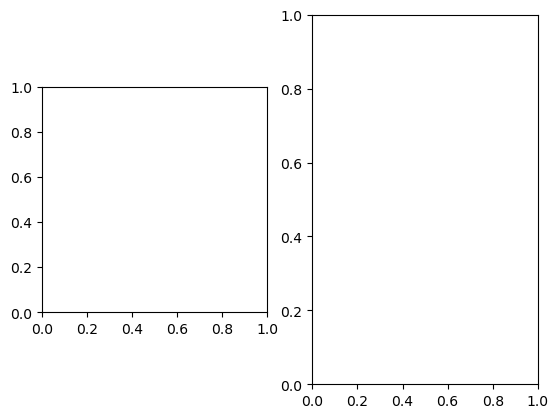

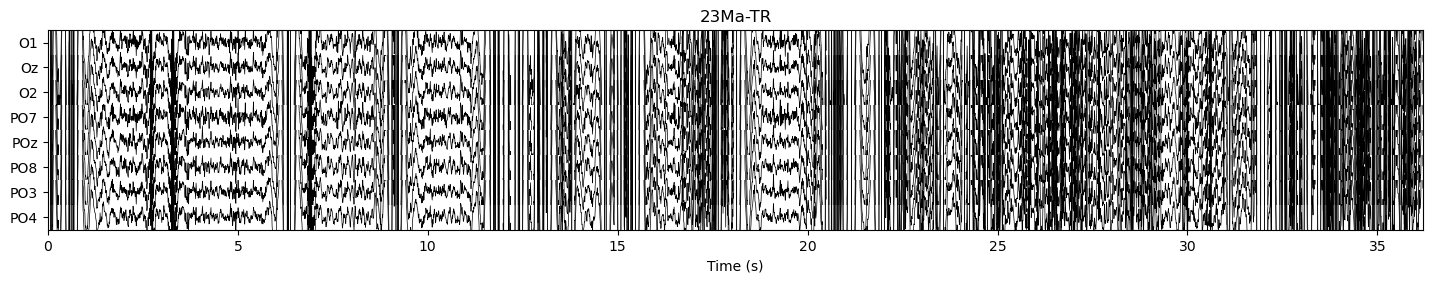

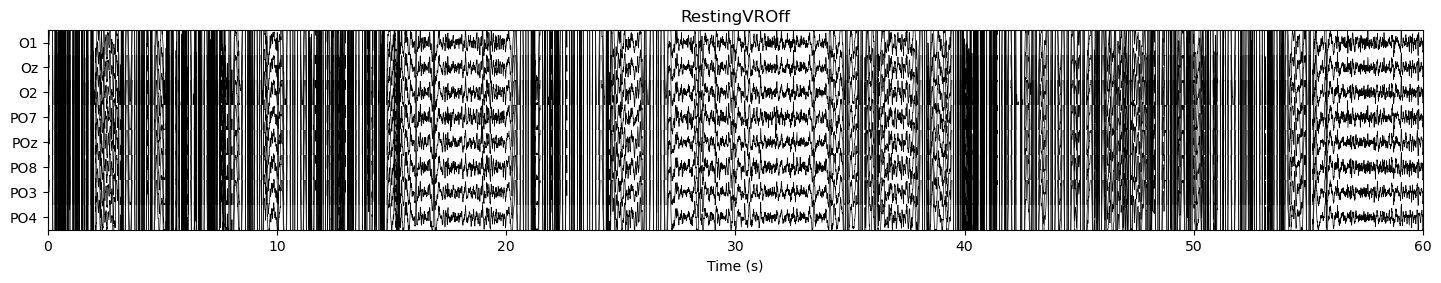

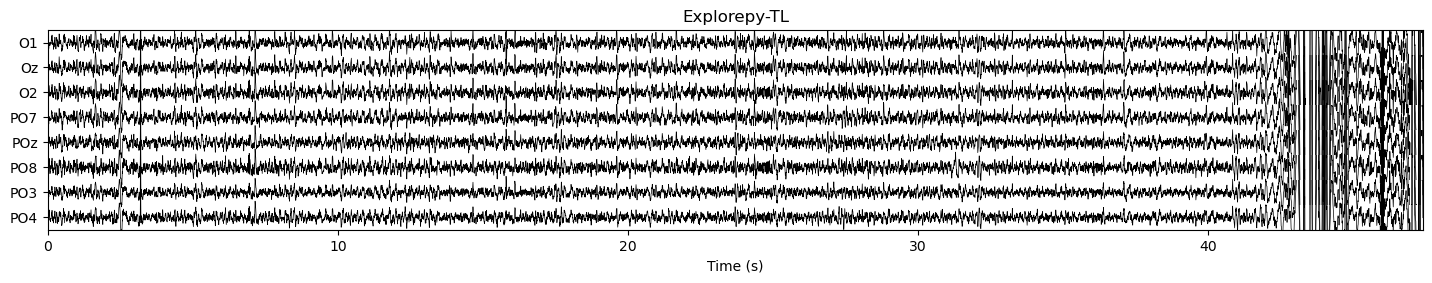

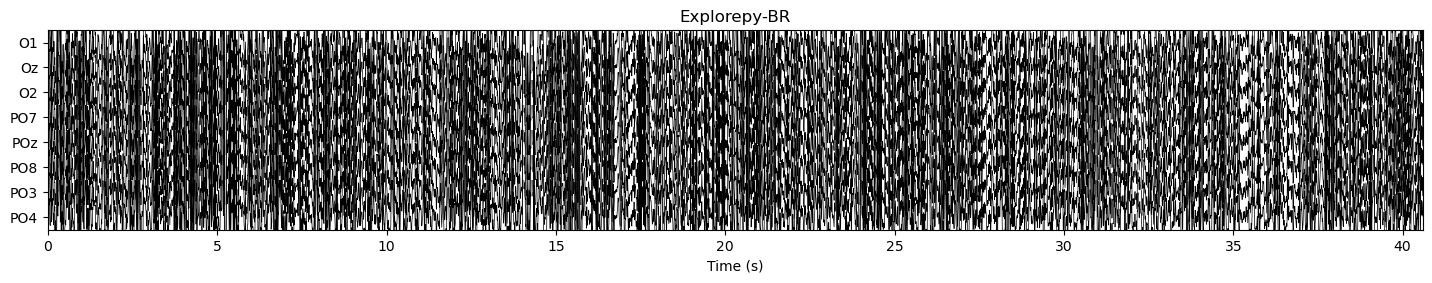

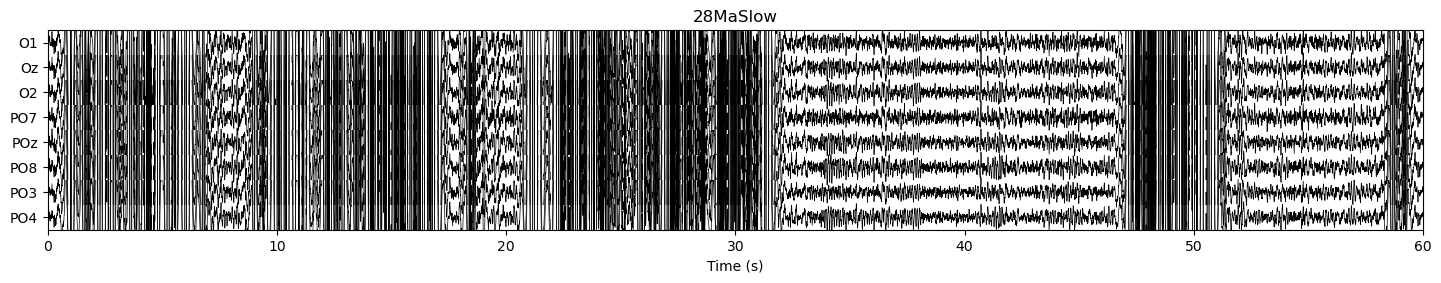

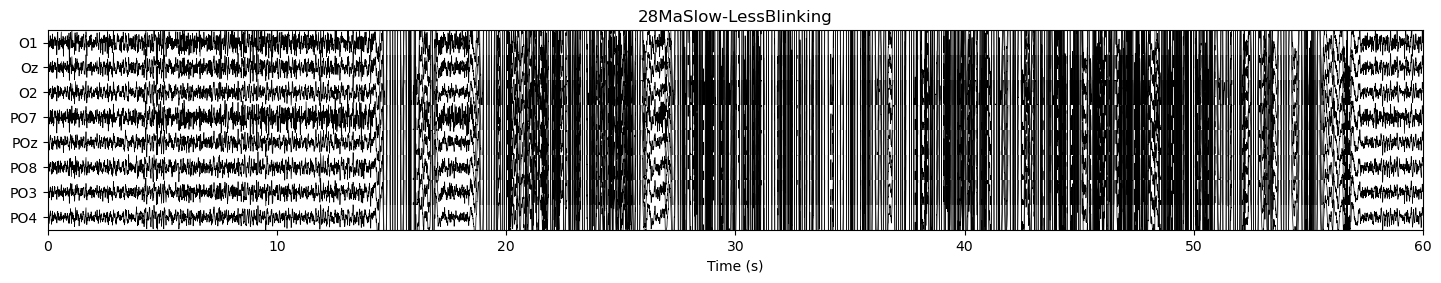

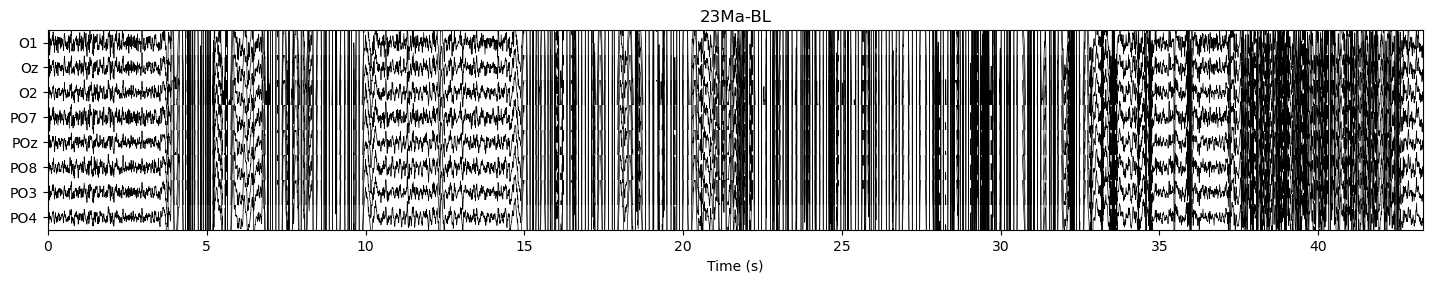

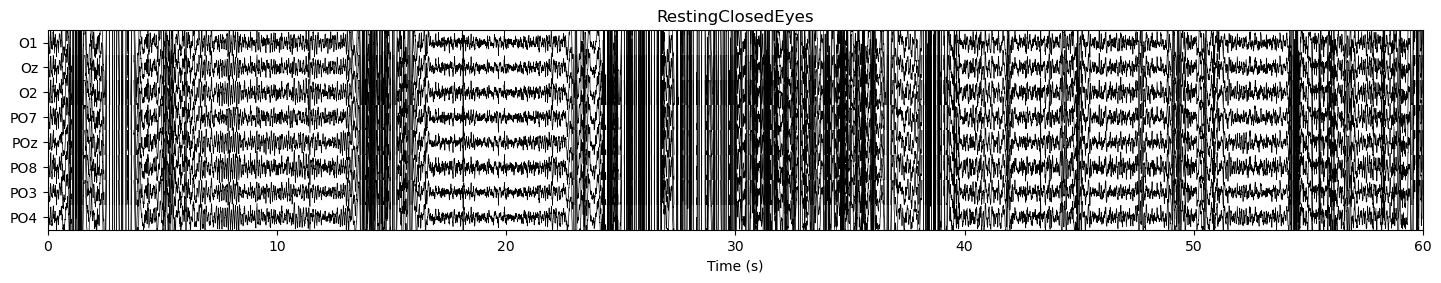

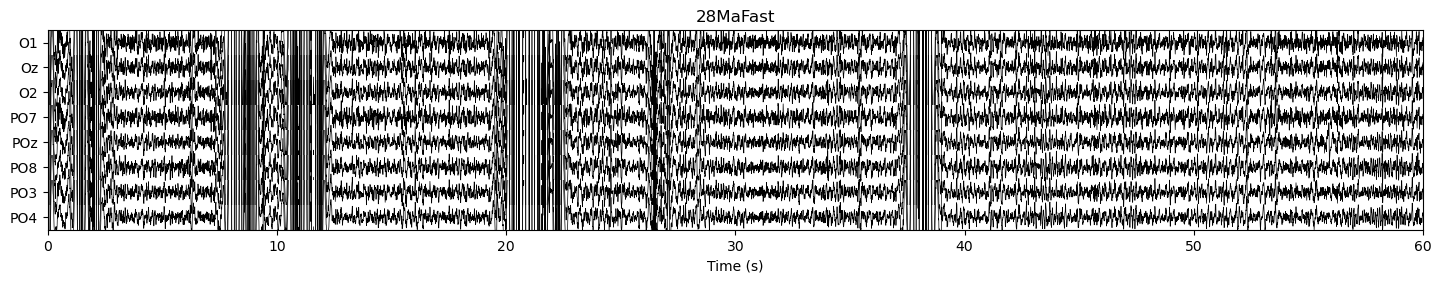

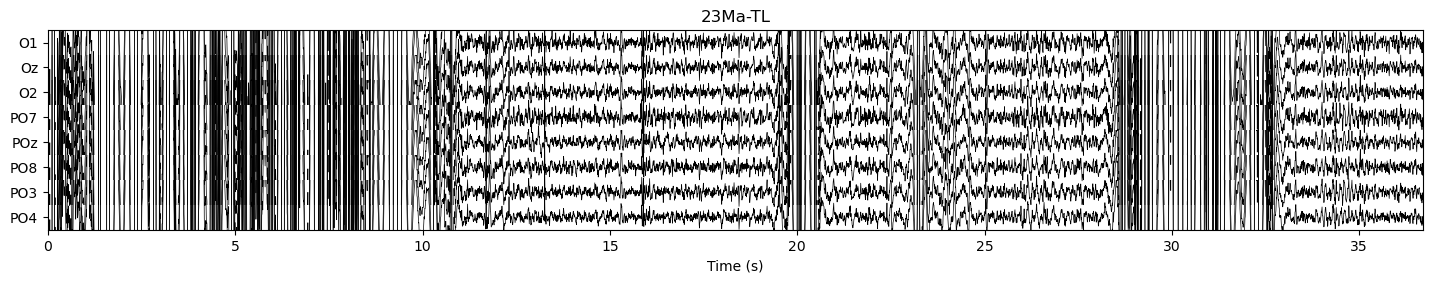

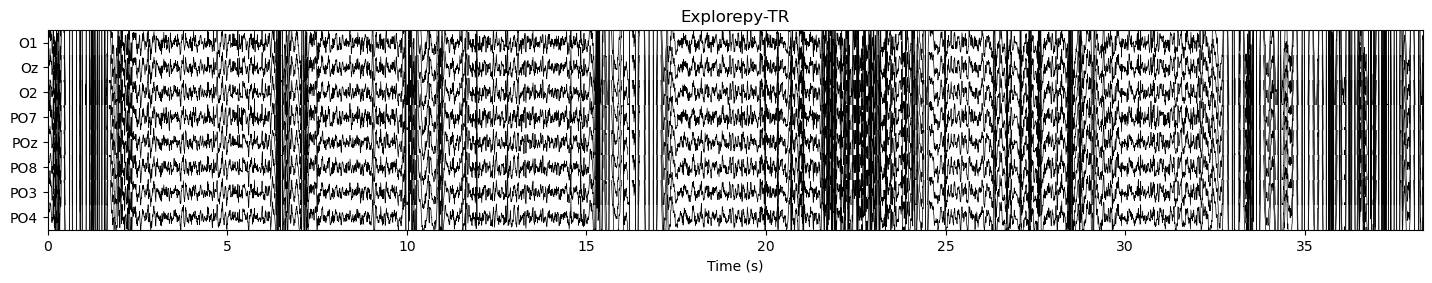

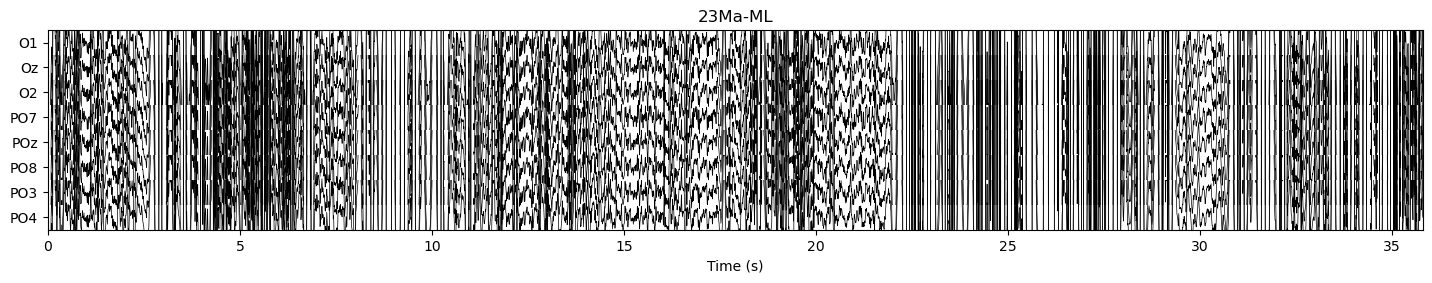

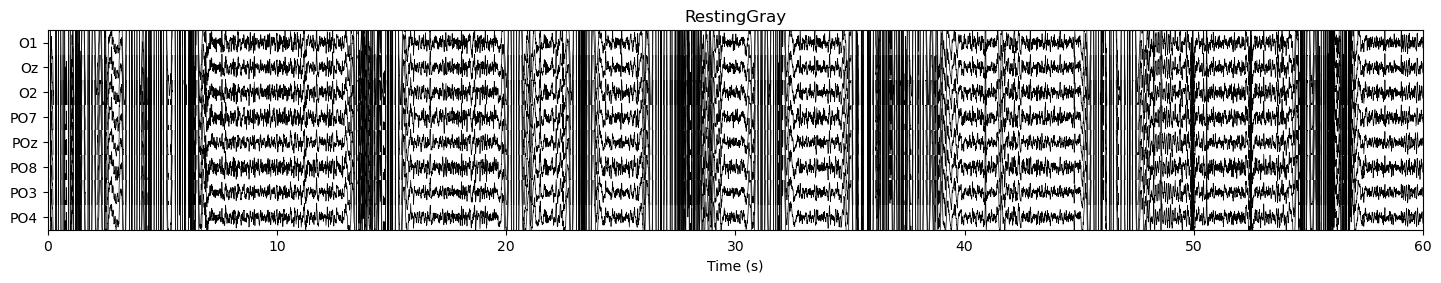

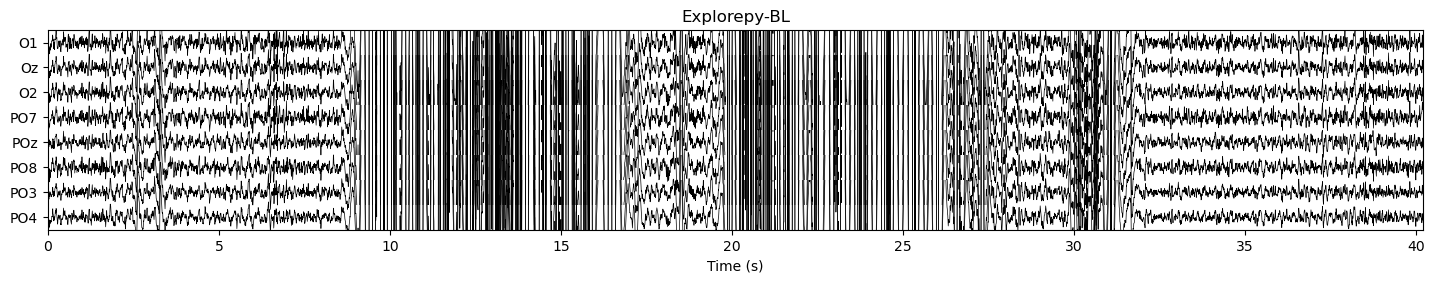

In [68]:
def plot(raw, chan_names, lf, hf):
    fig = raw.plot(show_scalebars=False, show_scrollbars=False, show_options=False, show=False, duration=60)
    fig.axes[0].set_title(raw.filename)
    fig.set_size_inches(15, 3)
    plt.tight_layout()
    plt.show()

for raw in raw_list:
    window = 6 # seconds
    lf = 4 # Hz
    hf = 25 # Hz
    plot(raw, chan_names, lf, hf)

/Users/alken/miniconda3/envs/thesis/lib/python3.10/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


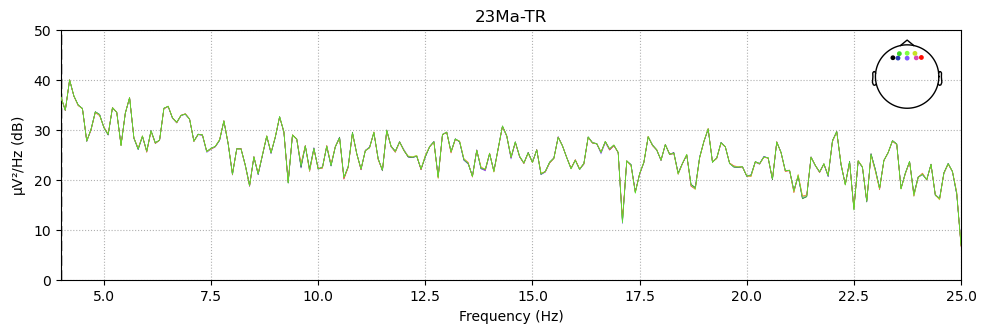

/Users/alken/miniconda3/envs/thesis/lib/python3.10/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


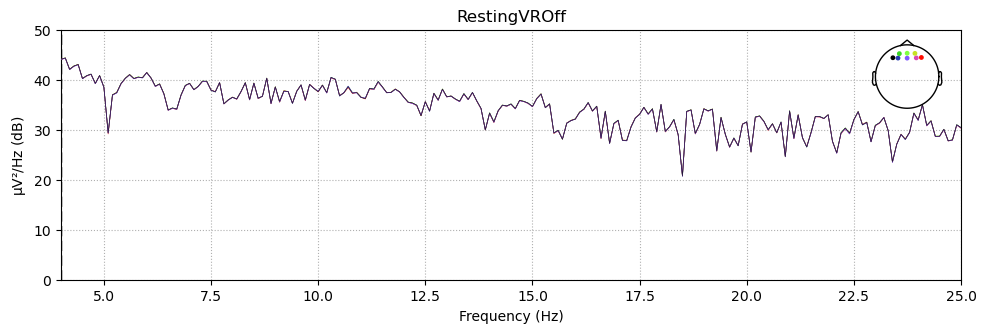

/Users/alken/miniconda3/envs/thesis/lib/python3.10/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


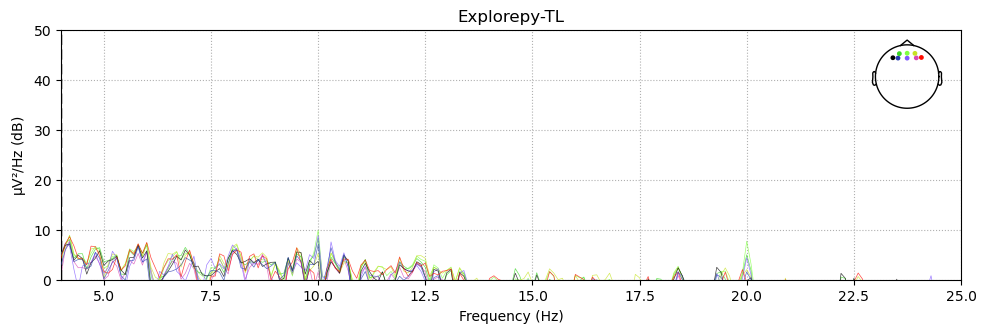

/Users/alken/miniconda3/envs/thesis/lib/python3.10/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


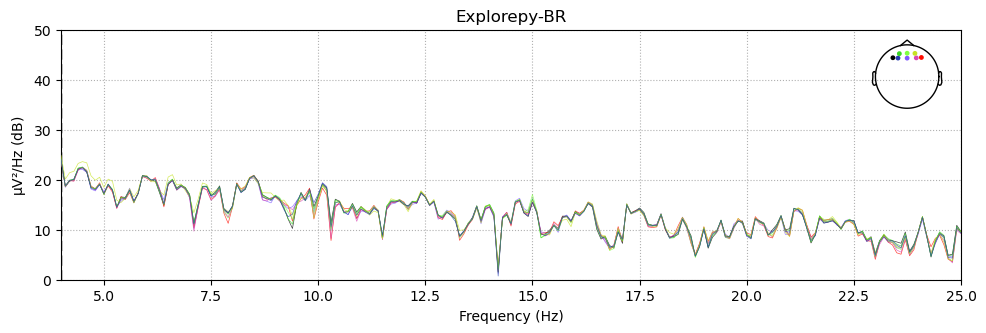

/Users/alken/miniconda3/envs/thesis/lib/python3.10/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


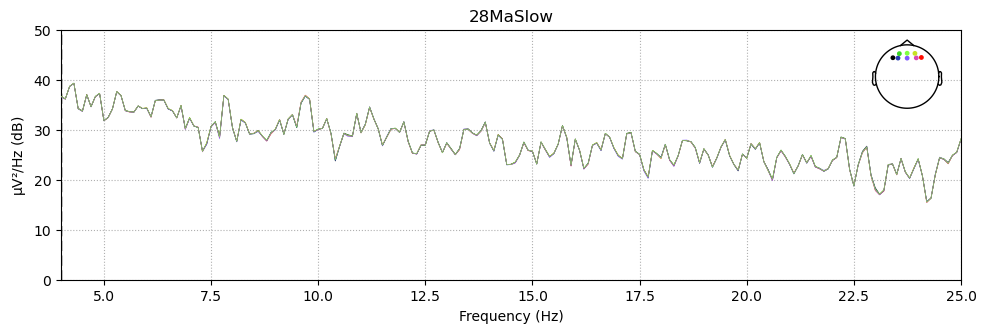

/Users/alken/miniconda3/envs/thesis/lib/python3.10/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


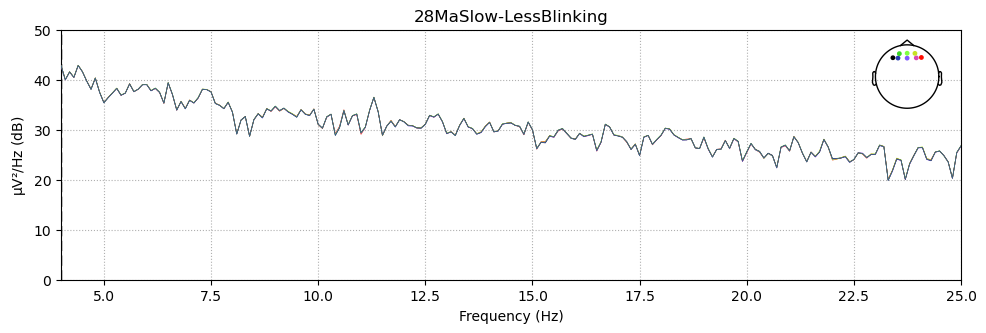

/Users/alken/miniconda3/envs/thesis/lib/python3.10/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


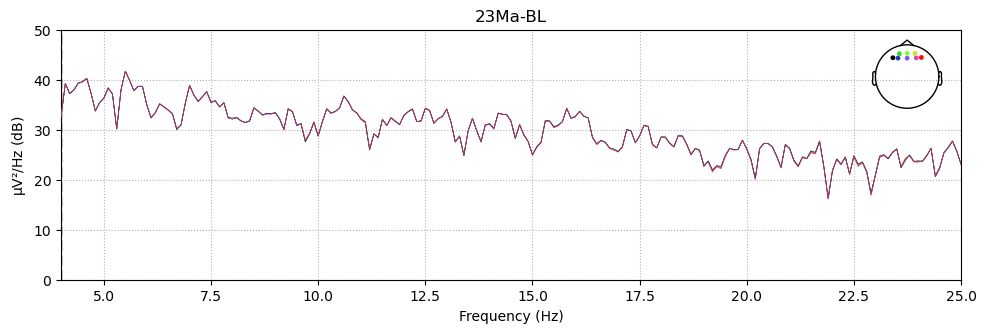

/Users/alken/miniconda3/envs/thesis/lib/python3.10/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


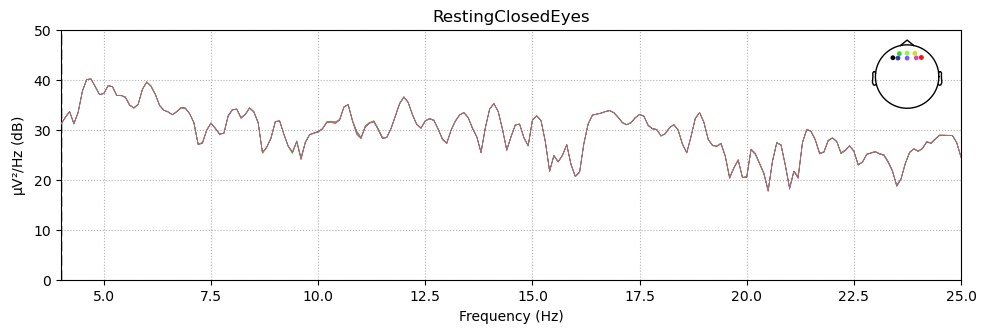

/Users/alken/miniconda3/envs/thesis/lib/python3.10/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


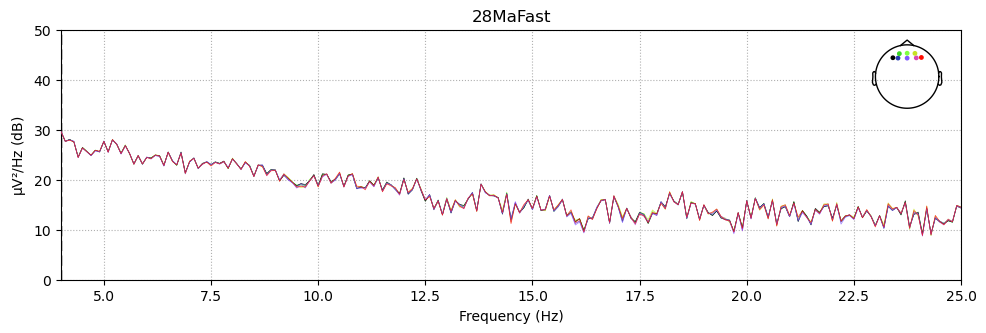

/Users/alken/miniconda3/envs/thesis/lib/python3.10/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


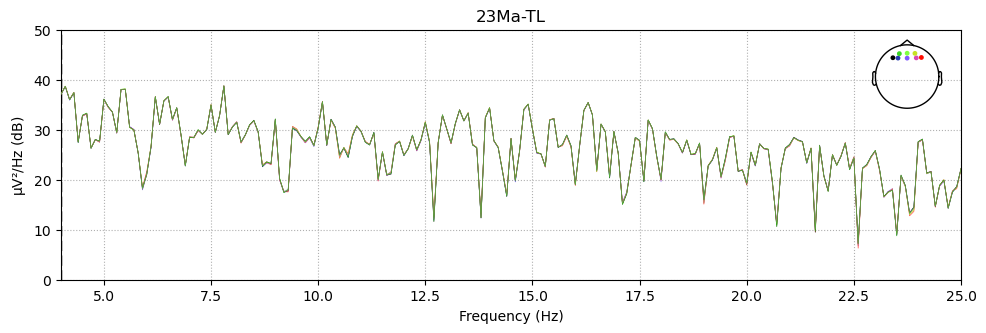

/Users/alken/miniconda3/envs/thesis/lib/python3.10/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


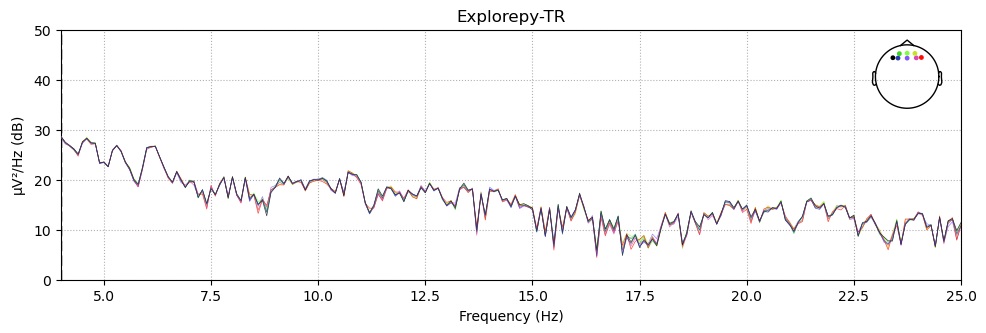

/Users/alken/miniconda3/envs/thesis/lib/python3.10/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


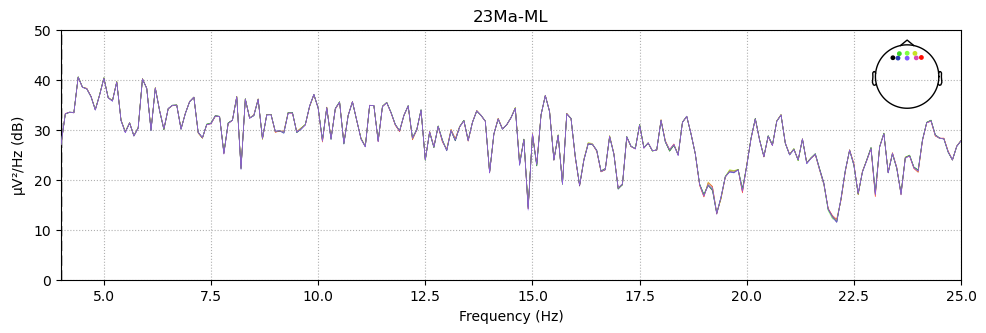

/Users/alken/miniconda3/envs/thesis/lib/python3.10/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


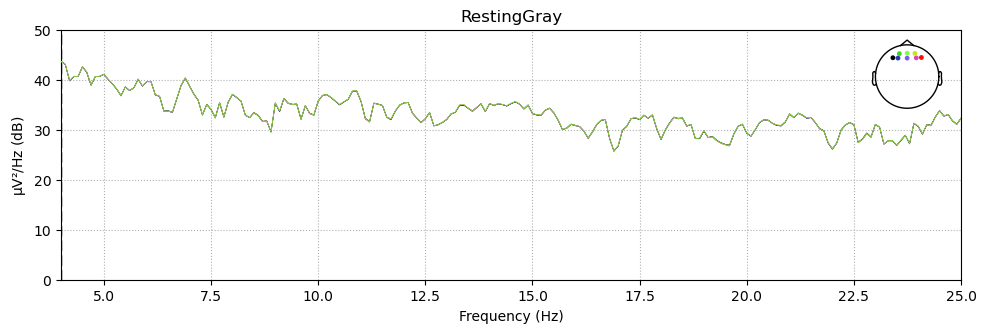

/Users/alken/miniconda3/envs/thesis/lib/python3.10/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


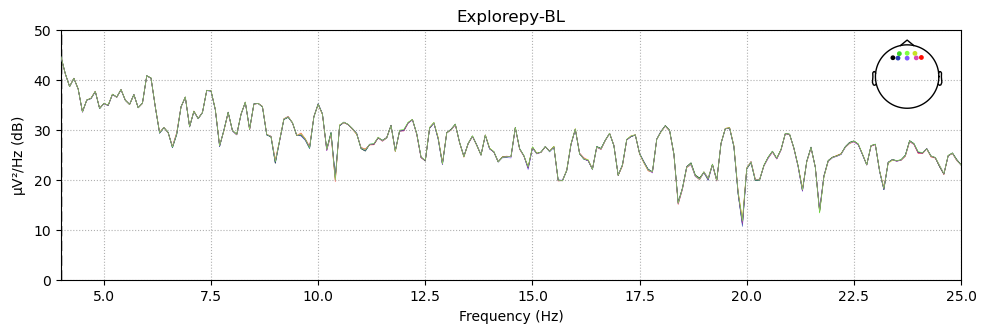

In [69]:
def plot_psd(raw, window, chan_names, lf, hf):
    spectrum = raw.compute_psd(verbose=False,n_fft=fs*window, n_per_seg=fs*window, fmin=lf, fmax=hf, picks=chan_names)
    fig = spectrum.plot()
    fig.axes[0].set_title(raw.filename)
    # set ylim 40
    fig.axes[0].set_ylim(0, 50)
    plt.show()

for raw in raw_list:
    window = 10 # seconds
    lf = 4 # Hz
    hf = 25 # Hz
    plot_psd(raw, window, chan_names, lf, hf)

In [70]:
# https://mne.tools/dev/auto_tutorials/time-freq/50_ssvep.html

def snr_spectrum(psd, noise_n_neighbor_freqs=1, noise_skip_neighbor_freqs=1):
    """Compute SNR spectrum from PSD spectrum using convolution.

    Parameters
    ----------
    psd : ndarray, shape ([n_trials, n_channels,] n_frequency_bins)
        Data object containing PSD values. Works with arrays as produced by
        MNE's PSD functions or channel/trial subsets.
    noise_n_neighbor_freqs : int
        Number of neighboring frequencies used to compute noise level.
        increment by one to add one frequency bin ON BOTH SIDES
    noise_skip_neighbor_freqs : int
        set this >=1 if you want to exclude the immediately neighboring
        frequency bins in noise level calculation

    Returns
    -------
    snr : ndarray, shape ([n_trials, n_channels,] n_frequency_bins)
        Array containing SNR for all epochs, channels, frequency bins.
        NaN for frequencies on the edges, that do not have enough neighbors on
        one side to calculate SNR.
    """
    # Construct a kernel that calculates the mean of the neighboring
    # frequencies
    averaging_kernel = np.concatenate((
        np.ones(noise_n_neighbor_freqs),
        np.zeros(2 * noise_skip_neighbor_freqs + 1),
        np.ones(noise_n_neighbor_freqs)))
    averaging_kernel /= averaging_kernel.sum()

    # Calculate the mean of the neighboring frequencies by convolving with the
    # averaging kernel.
    mean_noise = np.apply_along_axis(
        lambda psd_: np.convolve(psd_, averaging_kernel, mode='valid'),
        axis=-1, arr=psd
    )

    # The mean is not defined on the edges so we will pad it with nas. The
    # padding needs to be done for the last dimension only so we set it to
    # (0, 0) for the other ones.
    edge_width = noise_n_neighbor_freqs + noise_skip_neighbor_freqs
    pad_width = [(0, 0)] * (mean_noise.ndim - 1) + [(edge_width, edge_width)]
    mean_noise = np.pad(
        mean_noise, pad_width=pad_width, constant_values=np.nan
    )

    return psd / mean_noise

In [78]:
def plot_snr(raw, freq, tmin, tmax, fmin, fmax, sfreq, extraTitle):
    # raw.info['line_freq'] = freq

    # Set montage
    montage = mne.channels.make_standard_montage('easycap-M1')
    raw.set_montage(montage, verbose=False)

    # Set common average reference
    raw.set_eeg_reference('average', projection=False, verbose=False)

    # Apply bandpass filter
    raw.filter(l_freq=0.1, h_freq=None, fir_design='firwin', verbose=False)

    epoch_length = 1.0  # length of each epoch (in seconds)
    overlap = 0.0  
    epochs = mne.make_fixed_length_epochs(raw, duration=20, overlap=overlap, verbose=False)

    # Define the window length and step size
    window_length = 1.0  # length of each epoch (in seconds)
    step_size = 0.5      # step size between windows (in seconds)

    # Compute the start and end times for each window
    start_times = np.arange(0, raw.times[-1] - window_length, step_size)
    end_times = start_times + window_length

    spectrum = epochs.compute_psd(
        'welch',
        n_fft=int(sfreq * (tmax - tmin)),
        n_overlap=0, n_per_seg=None,
        tmin=tmin, tmax=tmax,
        fmin=fmin, fmax=fmax,
        window='boxcar',
        verbose=False)
    psds, freqs = spectrum.get_data(return_freqs=True)

    snrs = snr_spectrum(psds, noise_n_neighbor_freqs=3, noise_skip_neighbor_freqs=1)

    fig, axes = plt.subplots(2, 1, sharex='all', sharey='none', figsize=(8, 5))
    freq_range = range(np.where(np.floor(freqs) == 1.)[0][0],
                    np.where(np.ceil(freqs) == fmax - 1)[0][0])

    psds_plot = 10 * np.log10(psds)
    psds_mean = psds_plot.mean(axis=(0, 1))[freq_range]
    psds_std = psds_plot.std(axis=(0, 1))[freq_range]
    axes[0].plot(freqs[freq_range], psds_mean, color='b')
    axes[0].fill_between(
        freqs[freq_range], psds_mean - psds_std, psds_mean + psds_std,
        color='b', alpha=.2)
    axes[0].set(title="PSD spectrum", ylabel='Power Spectral Density [dB]')

    # SNR spectrum
    snr_mean = snrs.mean(axis=(0, 1))[freq_range]
    snr_std = snrs.std(axis=(0, 1))[freq_range]

    axes[1].plot(freqs[freq_range], snr_mean, color='r')
    axes[1].fill_between(
        freqs[freq_range], snr_mean - snr_std, snr_mean + snr_std,
        color='r', alpha=.2)
    axes[1].set(
        title="SNR spectrum", xlabel='Frequency [Hz]',
        ylabel='SNR', ylim=[-2, 30], xlim=[fmin, fmax])
    
    # increase time increment for x-axis
    xticks = np.arange(fmin, fmax, 1)
    #set size of inch for fig
    fig.set_size_inches(8, 8)
    axes[1].set_xticks(xticks)
    
    fig.suptitle(raw.filename + ' ' + extraTitle, fontsize=16)
    fig.tight_layout()
    plt.show()

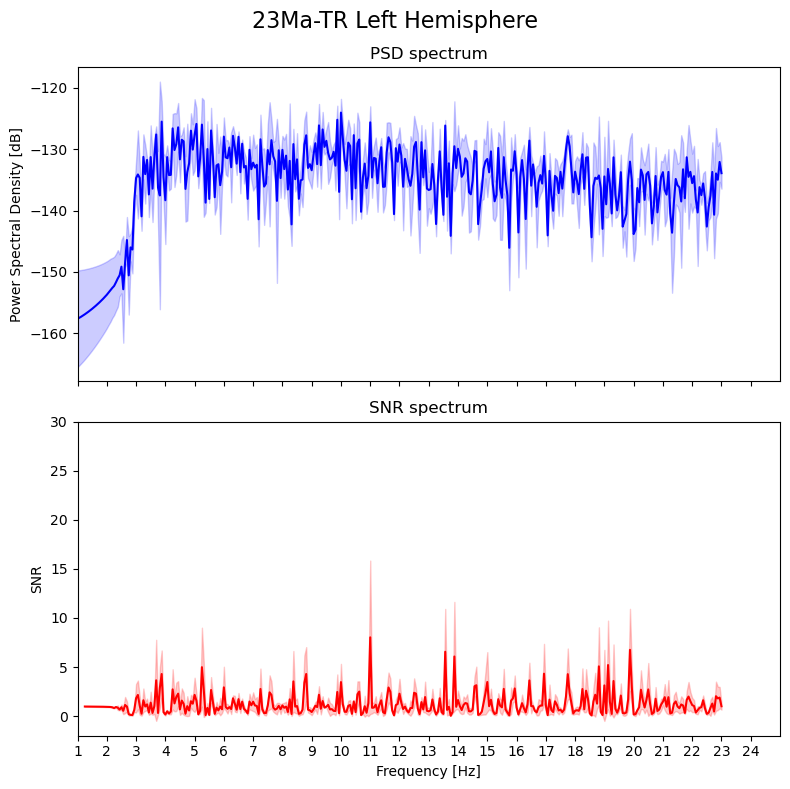

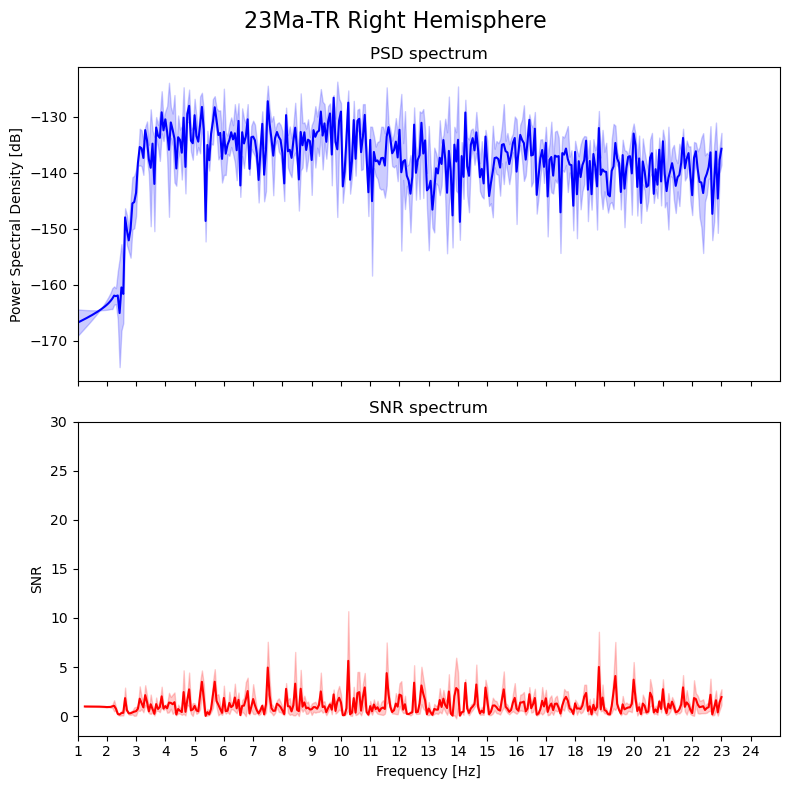

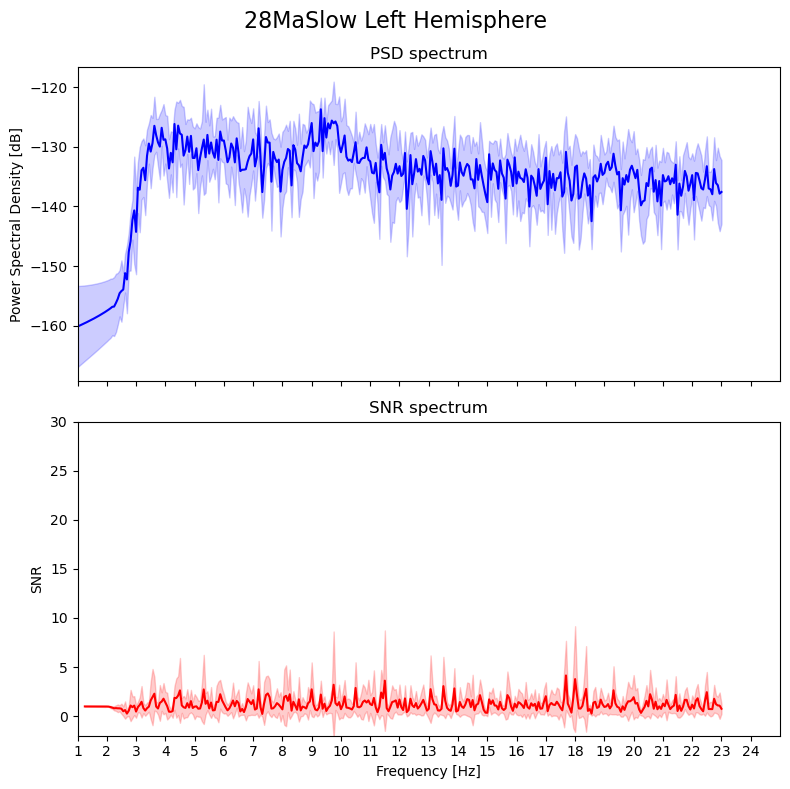

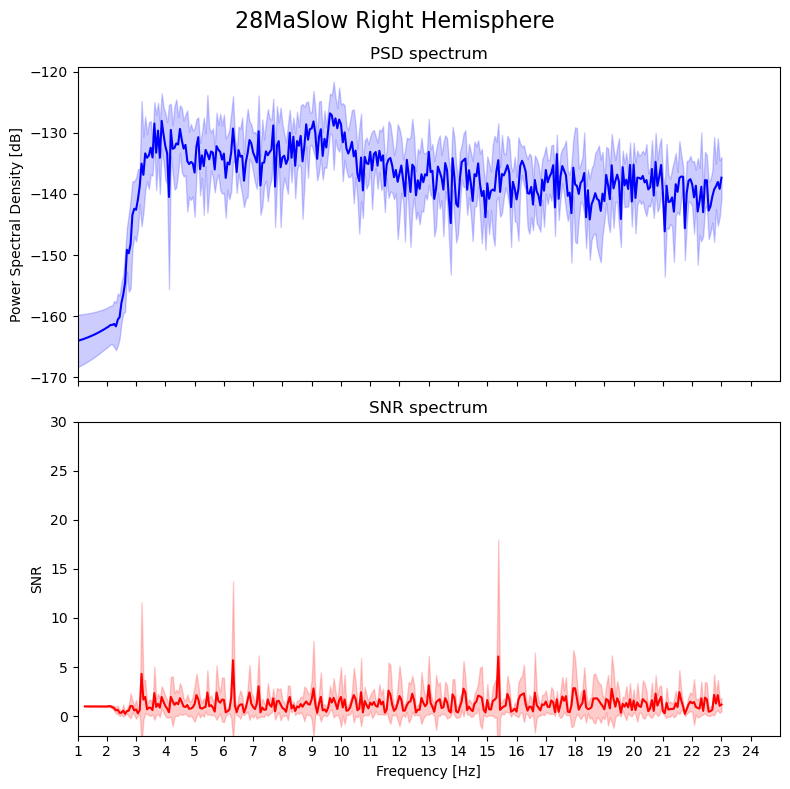

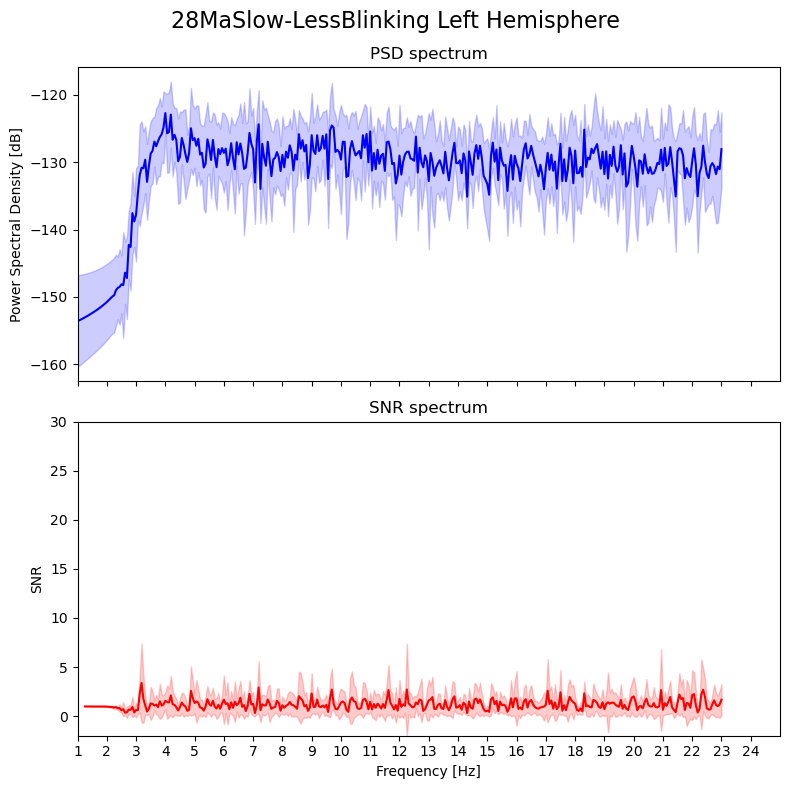

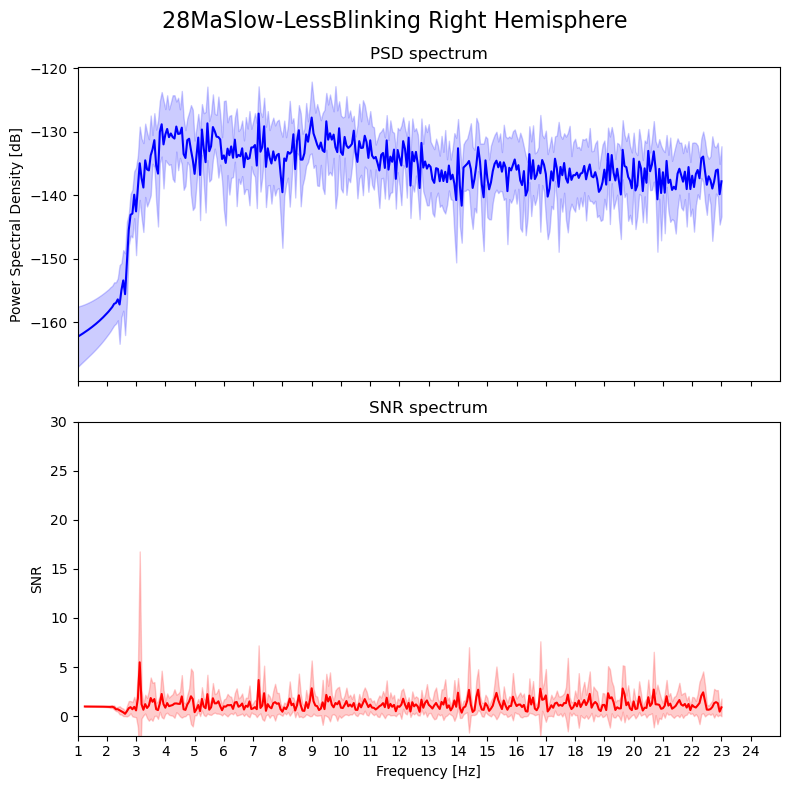

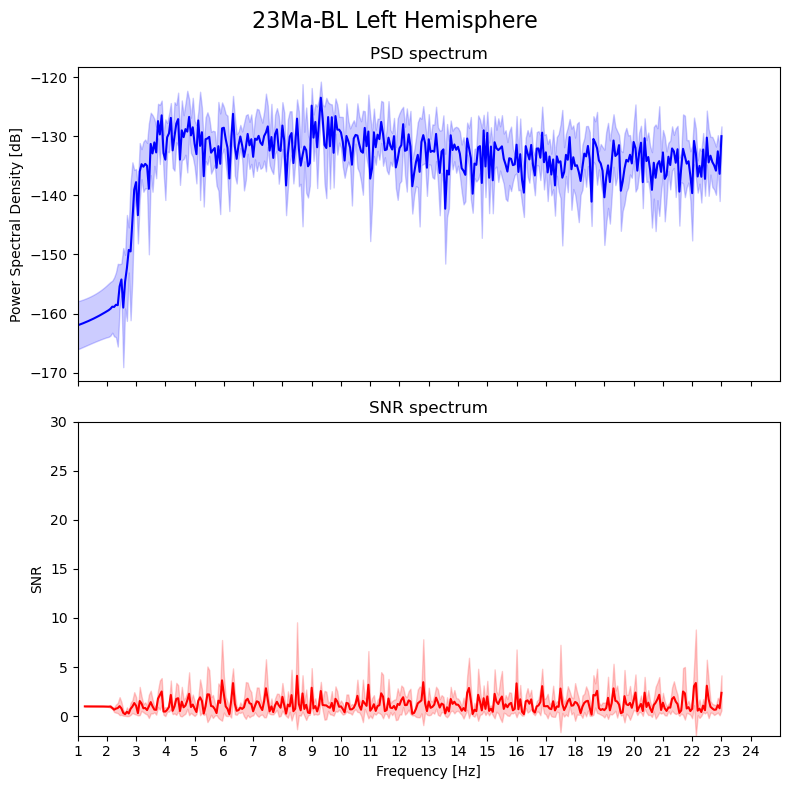

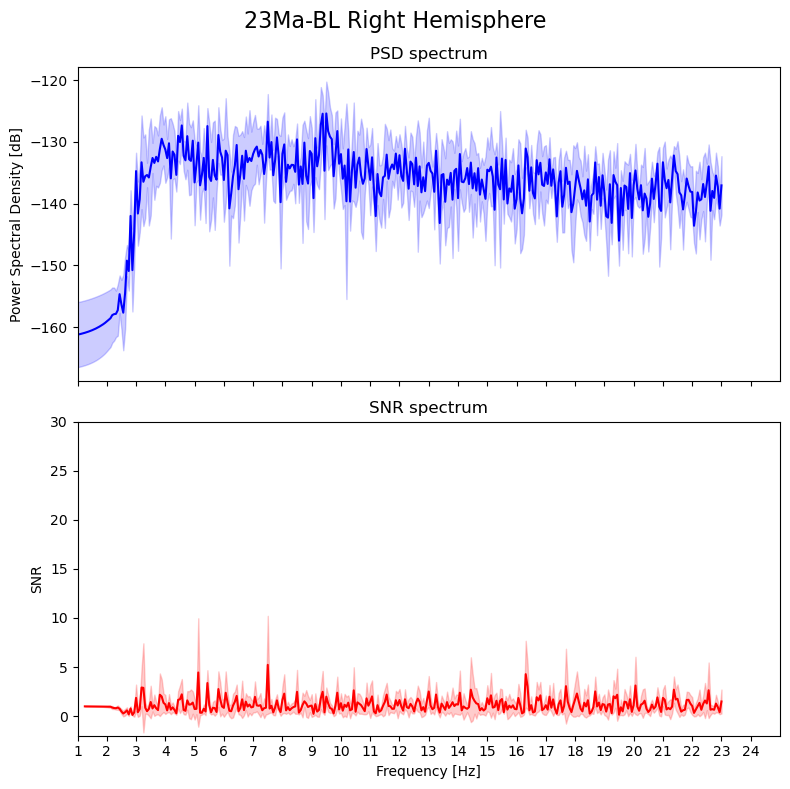

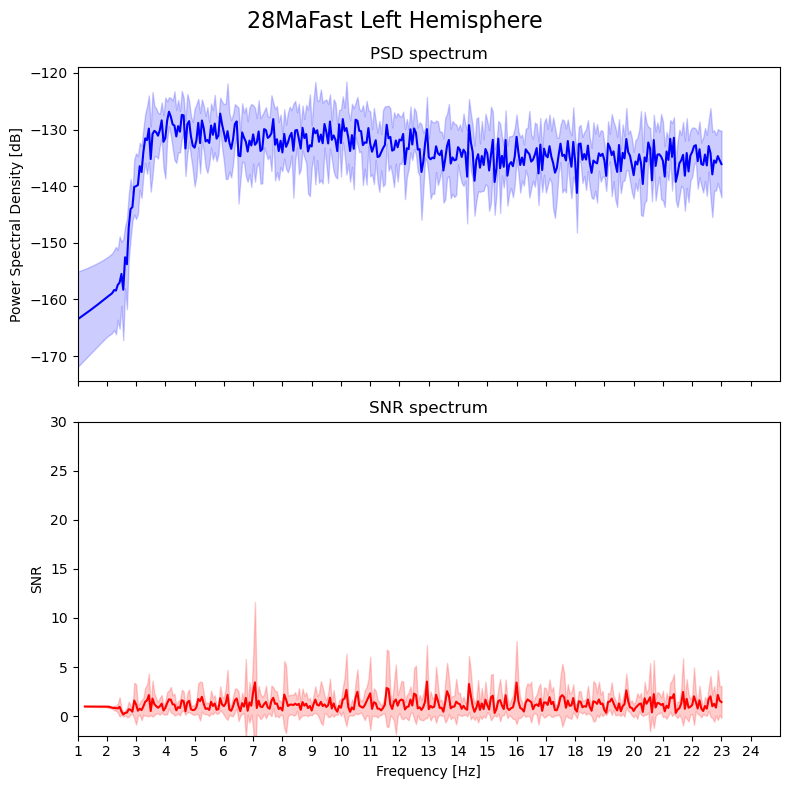

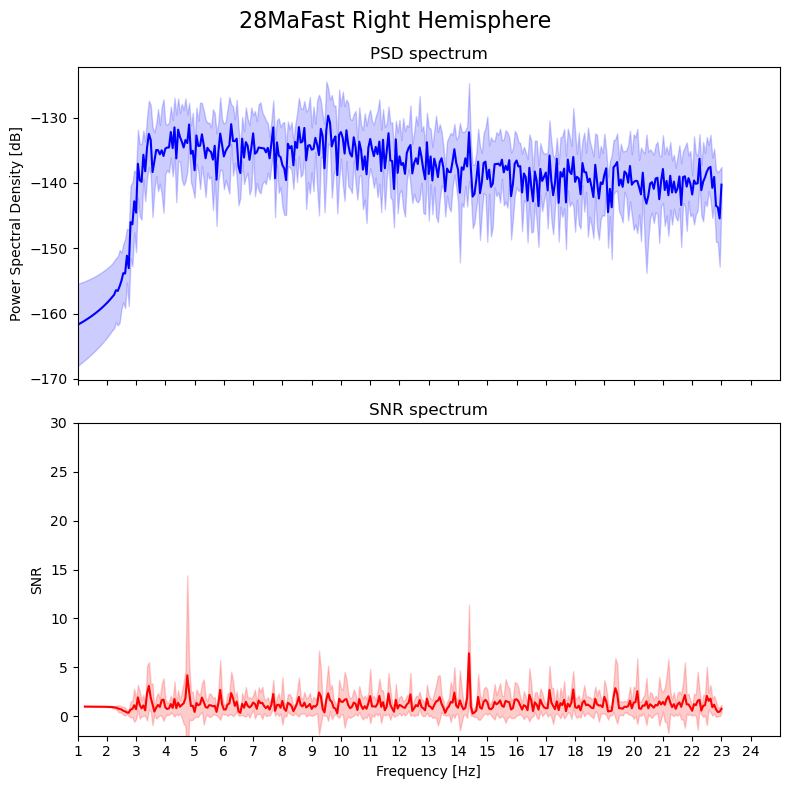

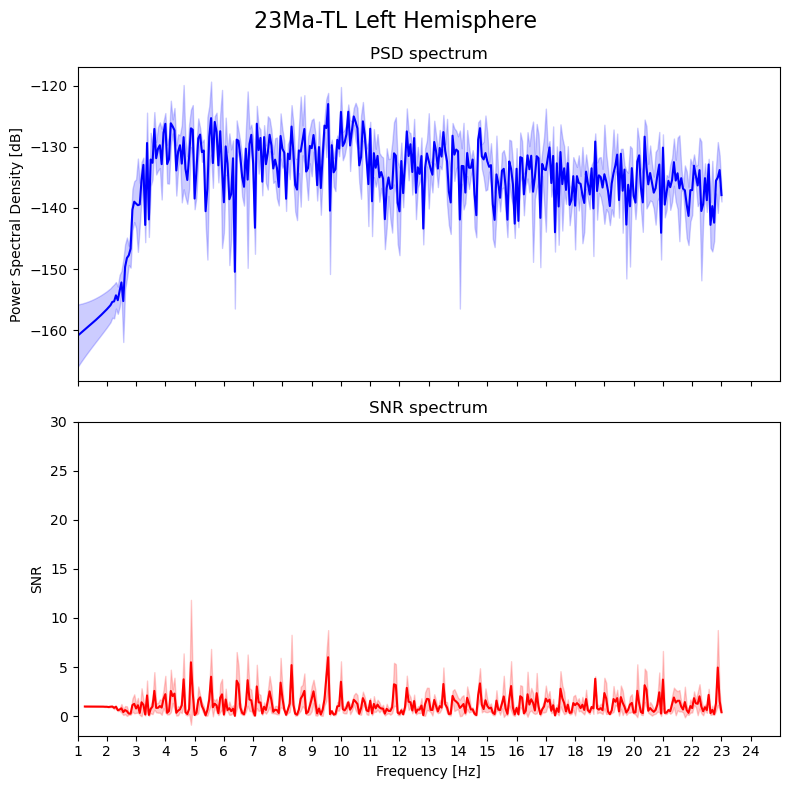

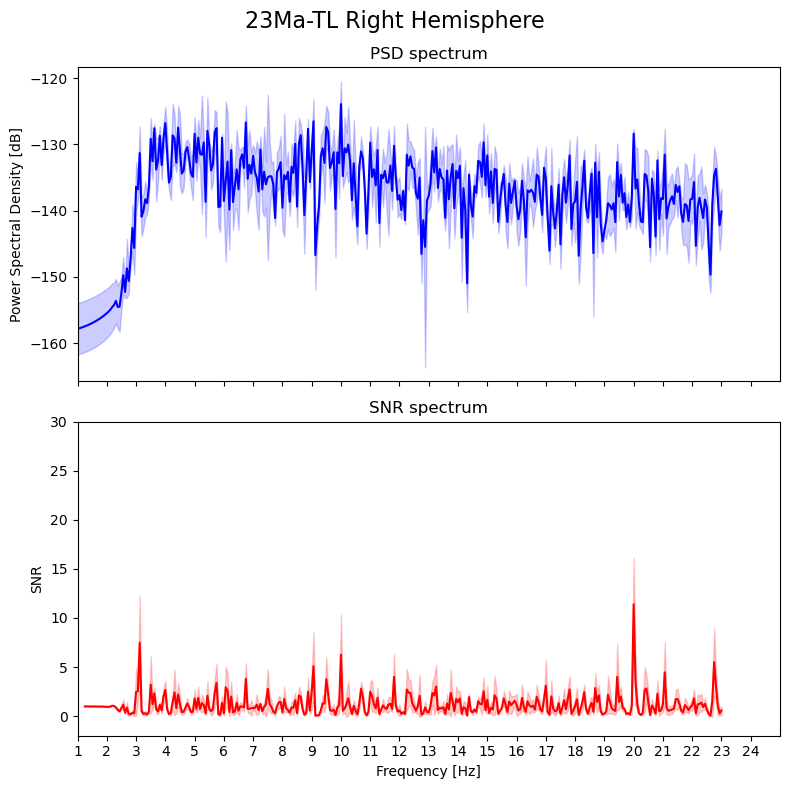

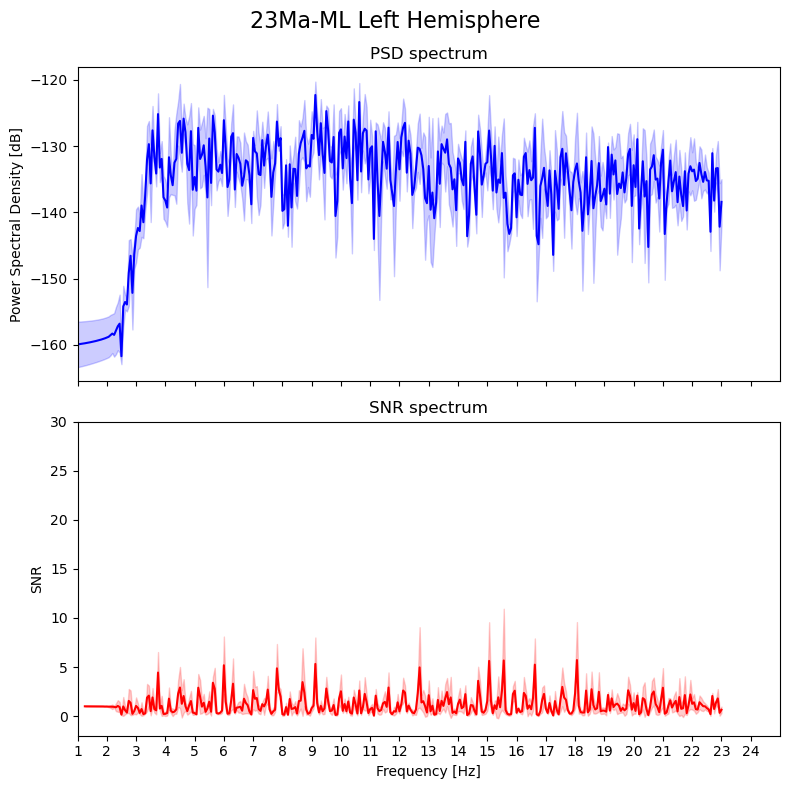

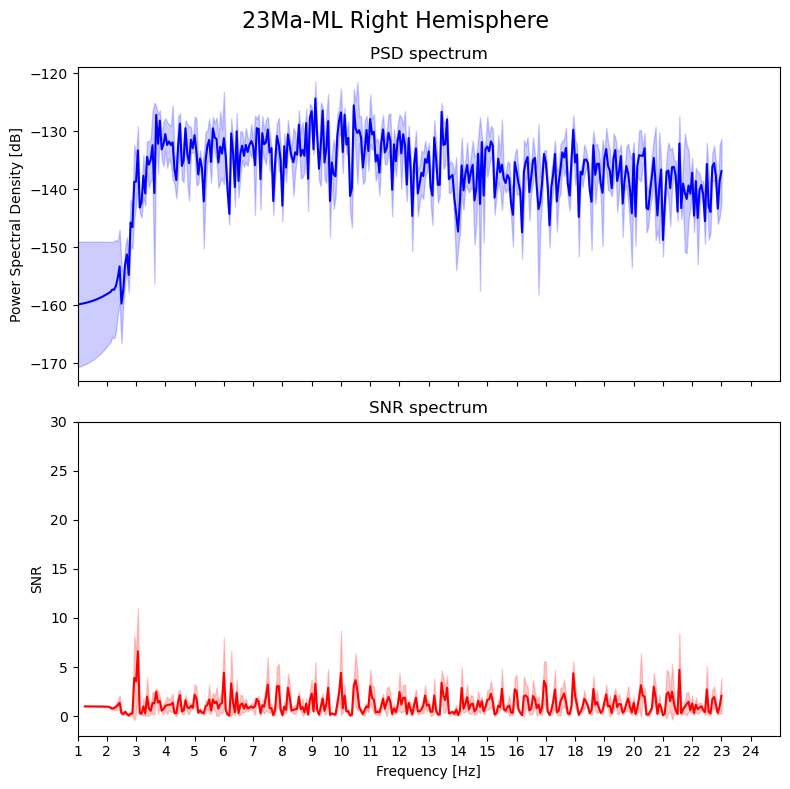

In [80]:
tmin = lf
tmax = 20
fmin = 1
fmax = 25
freqs = [7.5, 8.6, 10, 12]

for raw in raw_list:
    
    if 'Explorepy' not in raw.filename and 'Resting' not in raw.filename:
        raw_left = raw.copy().pick_channels(left_hemisphere)
        raw_right = raw.copy().pick_channels(right_hemisphere)
        plot_snr(raw_left, freqs, tmin, tmax, fmin, fmax, fs, "Left Hemisphere")
        plot_snr(raw_right, freqs, tmin, tmax, fmin, fmax, fs, "Right Hemisphere")